In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.8 MB/s eta 0:00:00


In [ ]:
# Import required libraries 
import json
import openai
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
my_key = ''
with open ('openai_api_key.json', 'r') as file_to_read:
  json_data = json.load(file_to_read)
  my_key = json_data ["API_KEY"]

openai.api_key = my_key

In [ ]:
# Load the prompt and completions files
prompt = []
with open("prompts.txt", "r") as f:
    for line in f:
        prompt.append(line.strip())

completions = []
with open("completions.txt", "r") as f:
    for line in f:
        completions.append(line.strip())

In [ ]:
# Initialize an empty list to store the sentiments
sentiments = []

# Loop through the prompt arguments and call the OpenAI model
for arg in prompt:
    # Call the OpenAI model and get the response
    response = openai.Completion.create(
        engine="curie:ft-aravindsp-2023-05-10-21-37-22",
        prompt=arg,
        temperature=0,
        max_tokens=1,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
        stop=["\n"]
    )
    # Extract the sentiment from the response
    sentiment = response["choices"][0]["text"]
    # Assume response is a variable that holds some value
    # Check if response is an integer

    # Append the sentiment to the list
    sentiments.append(sentiment)

In [ ]:
if len(sentiments)>1000:
  sentiments = np.delete(sentiments, -1)

In [ ]:
# Convert the sentiments and completions to numpy arrays
sentiments = np.array(sentiments)
completions = np.array(completions)

In [ ]:
len(sentiments)

1000

In [ ]:
np.savetxt("sentiments.txt", sentiments, delimiter="\n", fmt="%s")


In [ ]:
# This section to be replaced with a ML model soon.

# Define a function to treat the non-numeric values
def treat_non_int(x):
  # You can write your own logic here
  # For example, you can round the fractions to the nearest integer
  # or convert the strings to integers if possible
  # or return a default value otherwise
  try:
    # Convert x to a float and round it
    x = round(float(x))
    # Check if x is between 1 and 5
    if 1 <= x <= 5:
      # Return x as an integer
      return int(x)
    else:
      # Return a default value, for example 3
      return 3
  except:
    # Return a default value, for example 3
    return 3

# Assume completions is an np array that holds some values
# Apply the treat_non_int function to each element of completions
completions = np.vectorize(treat_non_int)(completions)

# Assume sentiments is an np array that holds some values
# Convert the array elements to integers
sentiments = sentiments.astype(int)

In [ ]:
np.savetxt("sentiments_processed.txt", sentiments, delimiter="\n", fmt="%d")


Classification report:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       193
           2       0.95      0.94      0.95       248
           3       0.92      0.94      0.93       199
           4       0.93      0.88      0.90       172
           5       0.94      0.97      0.95       188

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



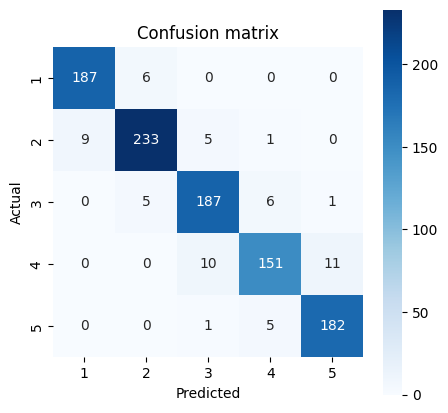

In [ ]:
# Display the confusion matrix and classification report
#print("Confusion matrix:")
cm = confusion_matrix(completions, sentiments, labels = [1,2,3,4,5])
#print(cm)
print("Classification report:")
print(classification_report(completions, sentiments))

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4 ,5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()